## Homework #8
* In this homework, we'll build a model for predicting if we have an image of a bee or a wasp

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

2023-11-13 15:28:01.490843: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 15:28:01.540726: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 15:28:01.540767: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 15:28:01.540803: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 15:28:01.549480: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 15:28:02.550035: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

In [2]:
# Define the model
model = Sequential()

In [3]:
# Add a convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

In [4]:
# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

In [5]:
# Flatten the output
model.add(Flatten())

In [6]:
# Add a dense layer with 64 neurons and 'relu' activation
model.add(Dense(64, activation='relu'))

In [7]:
# Add the output layer with 1 neuron and appropriate activation for binary classification
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compile the model with SGD optimizer
optimizer = SGD(learning_rate=0.002, momentum=0.8)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

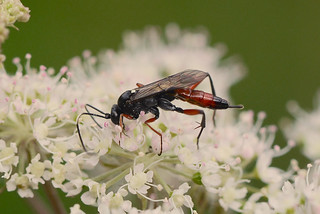

In [16]:
from tensorflow.keras.preprocessing.image import load_img
path = 'Neural_Network_data/test/wasp'
name = '20766103295_0eb008d288_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

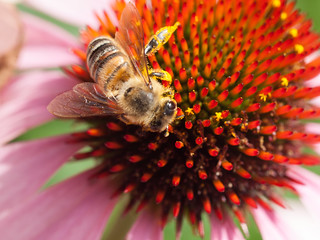

In [19]:
path = 'Neural_Network_data/test/bee'
name = '20830746591_13ce0d2498_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [20]:
# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
# Class Mode for Binary Classification
train_generator = train_datagen.flow_from_directory(
    'Neural_Network_data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  # Set this for binary classification
    shuffle=True
)


Found 3677 images belonging to 2 classes.


In [25]:
train_generator.class_indices

{'bee': 0, 'wasp': 1}

In [29]:
X, y = next(train_generator)
y[:10]

array([0., 0., 1., 1., 1., 1., 1., 0., 1., 1.], dtype=float32)

In [22]:
test_generator = test_datagen.flow_from_directory(
    'Neural_Network_data/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  # Set this for binary classification
    shuffle=True
)

Found 918 images belonging to 2 classes.


In [26]:
test_generator.class_indices

{'bee': 0, 'wasp': 1}

In [30]:
# Training with .fit()

import numpy as np

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Access the training accuracy for each epoch
training_accuracy = history.history['accuracy']

# Find the median
median_training_accuracy = np.median(training_accuracy)

print("Median Training Accuracy:", median_training_accuracy)

Epoch 1/10
184/184 [==============================] - 33s 176ms/step - loss: 0.6732 - accuracy: 0.5684 - val_loss: 0.6319 - val_accuracy: 0.6296
Epoch 2/10
184/184 [==============================] - 38s 205ms/step - loss: 0.6338 - accuracy: 0.6331 - val_loss: 0.5804 - val_accuracy: 0.6874
Epoch 3/10
184/184 [==============================] - 33s 178ms/step - loss: 0.5793 - accuracy: 0.7025 - val_loss: 0.6004 - val_accuracy: 0.6656
Epoch 4/10
184/184 [==============================] - 33s 178ms/step - loss: 0.5351 - accuracy: 0.7354 - val_loss: 0.5580 - val_accuracy: 0.6961
Epoch 5/10
184/184 [==============================] - 33s 181ms/step - loss: 0.5063 - accuracy: 0.7642 - val_loss: 0.5259 - val_accuracy: 0.7495
Epoch 6/10
184/184 [==============================] - 34s 183ms/step - loss: 0.4875 - accuracy: 0.7800 - val_loss: 0.5685 - val_accuracy: 0.7124
Epoch 7/10
184/184 [==============================] - 34s 186ms/step - loss: 0.4699 - accuracy: 0.7966 - val_loss: 0.5544 - val_ac

In [108]:
history.history['loss']

[0.6731763482093811,
 0.6337903141975403,
 0.5792608261108398,
 0.5350576639175415,
 0.5062988996505737,
 0.487481027841568,
 0.46991512179374695,
 0.4450696110725403,
 0.40846627950668335,
 0.3902395963668823]

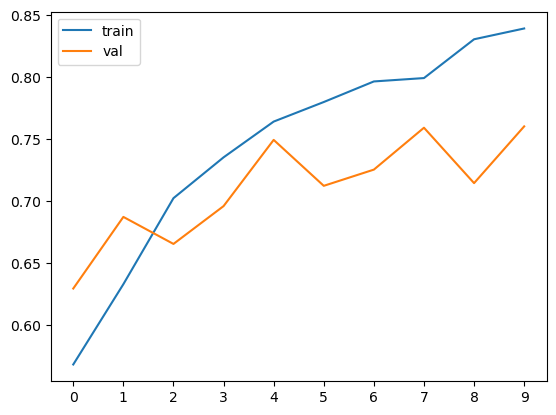

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [34]:
training_loss = history.history['loss']

# the standard deviation
std_dev_training_loss = np.std(training_loss)

print("Standard Deviation of Training Loss:", std_dev_training_loss)


Standard Deviation of Training Loss: 0.08848052208768585


In [35]:
# the augmented data generator
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create the augmented data generator for training
augmented_train_generator = augmented_datagen.flow_from_directory(
    'Neural_Network_data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',  # Set this for binary classification
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [36]:
# raining on augmented data
history_augmented = model.fit(
    augmented_train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
184/184 [==============================] - 74s 404ms/step - loss: 0.4998 - accuracy: 0.7675 - val_loss: 0.4904 - val_accuracy: 0.7876
Epoch 2/10
184/184 [==============================] - 53s 285ms/step - loss: 0.5009 - accuracy: 0.7680 - val_loss: 0.4753 - val_accuracy: 0.7832
Epoch 3/10
184/184 [==============================] - 39s 213ms/step - loss: 0.4923 - accuracy: 0.7629 - val_loss: 0.5246 - val_accuracy: 0.7614
Epoch 4/10
184/184 [==============================] - 38s 205ms/step - loss: 0.4800 - accuracy: 0.7653 - val_loss: 0.5544 - val_accuracy: 0.7462
Epoch 5/10
184/184 [==============================] - 39s 211ms/step - loss: 0.4777 - accuracy: 0.7822 - val_loss: 0.4708 - val_accuracy: 0.7832
Epoch 6/10
184/184 [==============================] - 50s 272ms/step - loss: 0.4707 - accuracy: 0.7884 - val_loss: 0.5001 - val_accuracy: 0.7702
Epoch 7/10
184/184 [==============================] - 69s 373ms/step - loss: 0.4673 - accuracy: 0.7865 - val_loss: 0.4753 - val_ac

In [37]:
test_loss_values_augmented = history_augmented.history['val_loss']

# calculate the mean
mean_test_loss_augmented = np.mean(test_loss_values_augmented)

print("Mean Test Loss (Augmented):", mean_test_loss_augmented)

Mean Test Loss (Augmented): 0.4874103516340256


In [38]:
test_accuracy_values_augmented = history_augmented.history['val_accuracy']

# test accuracy values for the last 5 epochs (epochs 6 to 10)
last_5_epochs_test_accuracy = test_accuracy_values_augmented[5:]

# the average (mean)
average_test_accuracy_last_5_epochs = np.mean(last_5_epochs_test_accuracy)

print("Average Test Accuracy (Last 5 Epochs):", average_test_accuracy_last_5_epochs)

Average Test Accuracy (Last 5 Epochs): 0.785185182094574
